amount of states:  250


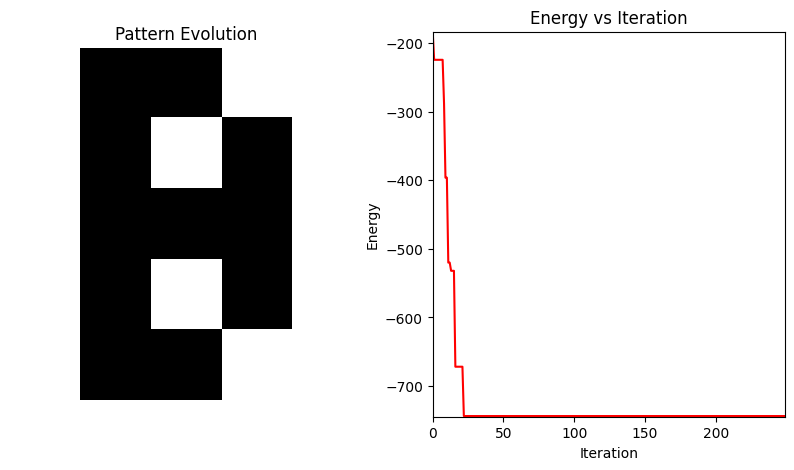

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from core.hopfield import Hopfield

# Seed for reproducibility
np.random.seed(42)

# Define the patterns (5x5 matrices)
pattern_A = np.array([
    [ 1,  1, -1,  1,  1],
    [ 1, -1,  1, -1,  1],
    [ 1, -1, -1, -1,  1],
    [ 1, -1,  1, -1,  1],
    [ 1, -1,  1, -1,  1]
])

pattern_B = np.array([
    [ 1, -1, -1,  1,  1],
    [ 1, -1,  1, -1,  1],
    [ 1, -1, -1,  1,  1],
    [ 1, -1,  1, -1,  1],
    [ 1, -1, -1,  1,  1]
])

pattern_C = np.array([
    [ 1, -1, -1, -1,  1],
    [ 1, -1,  1,  1,  1],
    [ 1, -1,  1,  1,  1],
    [ 1, -1,  1,  1,  1],
    [ 1, -1, -1, -1,  1]
])

pattern_D = np.array([
    [ 1, -1, -1,  1,  1],
    [ 1, -1,  1, -1,  1],
    [ 1, -1,  1, -1,  1],
    [ 1, -1,  1, -1,  1],
    [ 1, -1, -1,  1,  1]
])

patterns = np.array([
    pattern_A.flatten(),
    pattern_B.flatten(),
    pattern_C.flatten(),
    pattern_D.flatten()
])

# Function to add noise to the pattern
def add_noise(pattern, noise_level):
    noisy_pattern = pattern.copy()
    n_flip = int(noise_level * pattern.size)
    flip_indices = np.random.choice(pattern.size, n_flip, replace=False)
    noisy_pattern[flip_indices] *= -1
    return noisy_pattern

# Initialize the Hopfield network
n_neurons = patterns.shape[-1]
network = Hopfield(n_neurons=n_neurons)
network.train(patterns)

# Test with pattern A
original_pattern = patterns[0]
noisy_pattern = add_noise(original_pattern, noise_level=0.3)

# Update the network and get the states and energies over time
# Hay (n_neurons*n_neurons) pasadas por cada step 
final_state, states = network.update(noisy_pattern, max_steps=10, is_synchronous=False)

print("amount of states: ", len(states))
# Calculate the energy at each state
energies = [network.energy(state) for state in states]

# --------------------------- GIF creation ---------------------------

# Create the figure with two subplots (pattern evolution and energy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Initialize the image display for pattern
img = ax1.imshow(states[0].reshape((5, 5)), cmap='gray', vmin=-1, vmax=1)
ax1.set_title('Pattern Evolution')
ax1.axis('off')

# Initialize the energy plot
ax2.set_title('Energy vs Iteration')
ax2.set_xlim(0, len(states) - 1)
ax2.set_ylim(min(energies) - 1, max(energies) + 1)
energy_line, = ax2.plot([], [], color='r')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Energy')

# Initialize function for animation
def init():
    img.set_array(np.zeros((5, 5)))
    energy_line.set_data([], [])
    return img, energy_line

# Update function for animation
def update(frame):
    img.set_array(states[frame].reshape((5, 5)))
    energy_line.set_data(range(frame + 1), energies[:frame + 1])
    return img, energy_line

ani = animation.FuncAnimation(fig, update, frames=len(states), init_func=init, blit=True, interval=500)

ani.save('hopfield_recovery_energy.gif', writer='pillow')

plt.show()
